In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [21]:
class TSNEVisualizer:
    def __init__(self, feature_col="Features", label_col="Label",
                 perplexity=30, random_state=42):
        self.feature_col  = feature_col
        self.label_col    = label_col
        self.perplexity   = perplexity
        self.random_state = random_state

    def plot(self,
             csv_path,
             sample_limit=None,
             red_label=0,
             blue_label=1,
             feature_col=None,
             label_col=None):
        # allow overrides
        feat_col = feature_col or self.feature_col
        lab_col  = label_col   or self.label_col

        # 1) Load
        embs, labels = [], []
        with open(csv_path, 'r') as f:
            reader = csv.DictReader(f)
            for i, row in enumerate(reader):
                if sample_limit and i >= sample_limit:
                    break
                emb = np.fromstring(row[feat_col].strip('[]'), sep=' ')
                embs.append(emb)
                labels.append(int(row[lab_col]))
        embs  = np.stack(embs, axis=0)
        labels = np.array(labels)

        # 2) t-SNE
        tsne = TSNE(n_components=2,
                    perplexity=self.perplexity,
                    random_state=self.random_state)
        embs2 = tsne.fit_transform(embs)

        # 3) Colors & plotting (same as before)
        colors = np.where(labels == blue_label, 'blue', 'red')
        plt.figure(figsize=(8,8))
        plt.scatter(embs2[:,0], embs2[:,1], c=colors, alpha=0.7, s=50)
        plt.title(f"t-SNE: Classic PGD")
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        legend_elems = [
            Line2D([0],[0], marker='o', color='w', label=f'AI generated',
                   markerfacecolor='red', markersize=10),
            Line2D([0],[0], marker='o', color='w', label=f'real',
                   markerfacecolor='blue', markersize=10),
        ]
        plt.legend(handles=legend_elems, title="Labels")
        plt.tight_layout()
        plt.show()


In [22]:
viz = TSNEVisualizer(perplexity=30)

In [23]:
# File B uses "Features" & "Category"
viz.plot(
    "/content/drive/MyDrive/IDL Image Generation/images_hidden_state_embedding.csv",
    feature_col="embedding",
    label_col="label",
)


KeyError: 'embedding'

In [ ]:
viz.plot(
    "/content/drive/MyDrive/IDL Image Generation/classic_pgd_clip_embeddings.csv",
    feature_col="embedding",
    label_col="label",
)


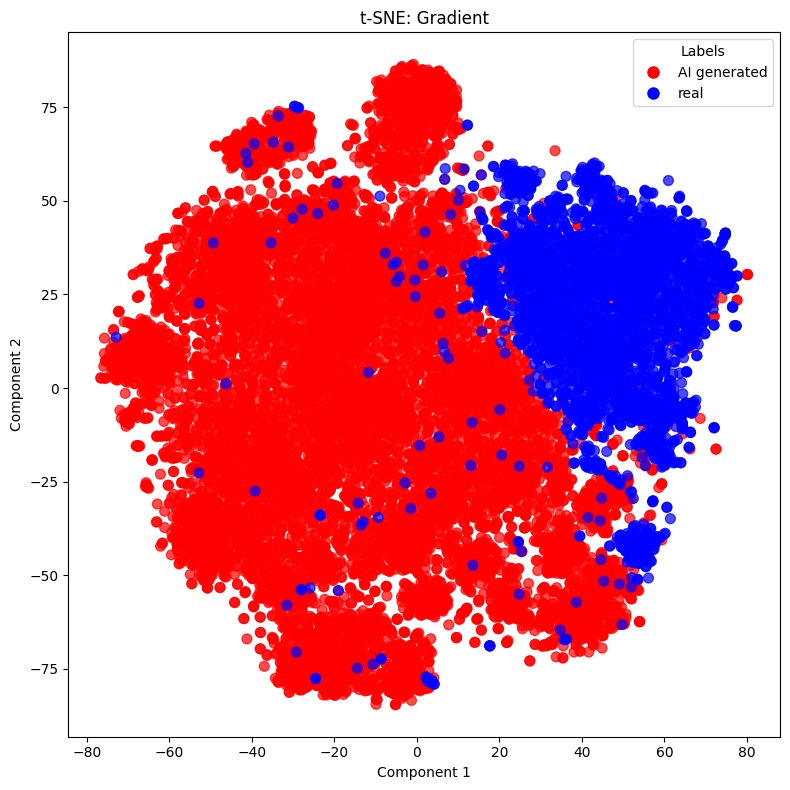

In [20]:
viz.plot(
    "/content/drive/MyDrive/IDL Image Generation/grad_2_clip_embeddings.csv",
    feature_col="embedding",
    label_col="label",
)


In [ ]:
import pandas as pd

def compute_fool_rate(csv_path, label_col="Label", pred_col="Prediction"):
    """
    Reads a CSV with ground-truth labels and model predictions,
    then computes: P(predicted=1 | label=0).

    Parameters
    ----------
    csv_path : str
        Path to your CSV file. Must contain at least two columns:
        - label_col: 0 for AI-generated, 1 for real
        - pred_col : model’s predicted 0/1 labels
    label_col : str
        Name of the column with the ground-truth labels.
    pred_col : str
        Name of the column with your model’s predicted labels.

    Returns
    -------
    float
        Fool rate as a fraction in [0,1], or None if no AI rows found.
    """
    df = pd.read_csv(csv_path, usecols=[label_col, pred_col])
    ai = df[df[label_col] == 0]
    n_ai = len(ai)
    if n_ai == 0:
        print("No AI-generated rows found in the CSV.")
        return None

    n_fooled = (ai[pred_col] == 1).sum()
    rate = n_fooled / n_ai

    print(f"Fool rate: {rate:.2%}  ({n_fooled}/{n_ai} AI images labeled as real)")
    return rate

# Example usage:
compute_fool_rate(
    "/content/drive/MyDrive/IDL Image Generation/attention_clip_embeddings.csv",
    label_col="Label",
    pred_col="Prediction"
)
